In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats
import math
import sklearn.metrics as skm

sns.set()
style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None

In [58]:
data = pd.read_csv('data.csv')
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [59]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed.\n")
    return data

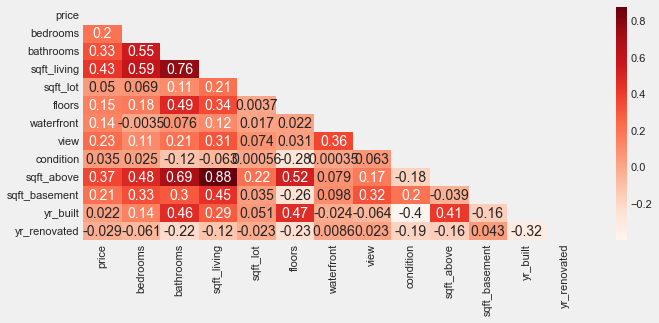

In [60]:
plt.figure(figsize=(10,4))
corr_data = data.drop(['date'], axis = 1)

corr_mask = np.triu(corr_data.corr())
h_map = sns.heatmap(corr_data.corr(), mask = corr_mask, cmap = 'Reds',annot = True)

Outliers of price are removed.

Outliers of sqft_lot are removed.



((array([-3.56495458, -3.32526374, -3.19292992, ...,  3.19292992,
          3.32526374,  3.56495458]),
  array([1, 1, 1, ..., 5, 5, 5], dtype=int64)),
 (0.5616120064950108, 3.4478865844053557, 0.8375024836412847))

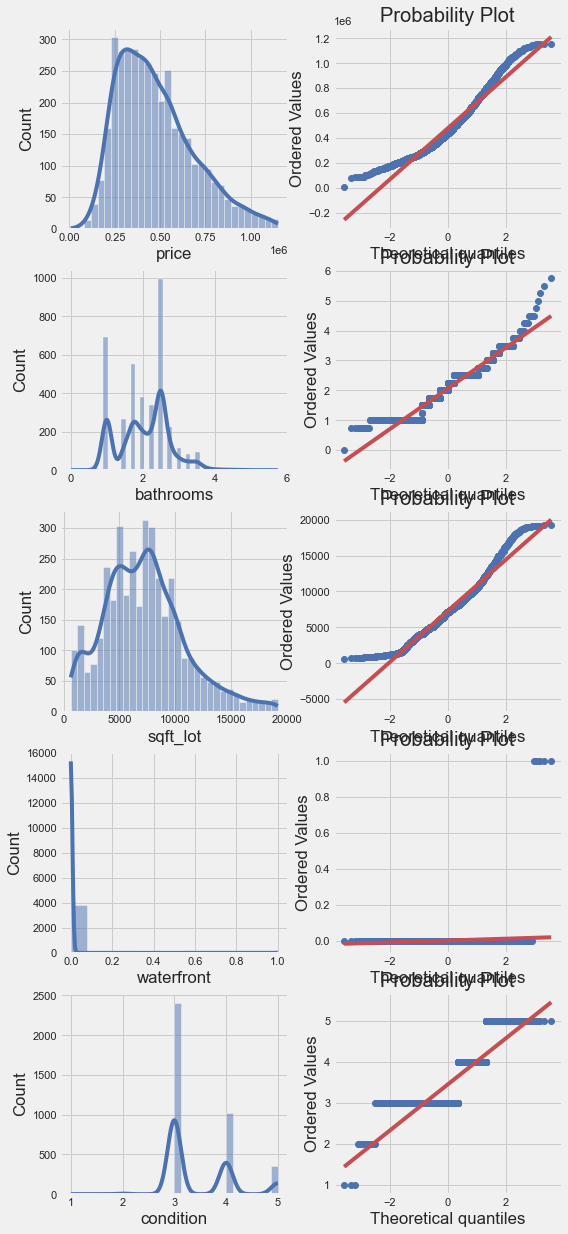

In [61]:
new_data=remove_outliers(data, 'price')
new_data=remove_outliers(new_data, 'sqft_lot')
fig = plt.figure(figsize=(8, 20))
grid = GridSpec(ncols=2, nrows=5, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0,0])
sns.histplot(new_data['price'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[0, 1])
stats.probplot(new_data['price'], plot=ax2)

# Histogram
ax1 = fig.add_subplot(grid[1, 0])
sns.histplot(new_data['bathrooms'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[1,1])
stats.probplot(new_data['bathrooms'], plot=ax2)

# Histogram
ax1 = fig.add_subplot(grid[2, 0])
sns.histplot(new_data['sqft_lot'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[2, 1])
stats.probplot(new_data['sqft_lot'], plot=ax2)

# Histogram
ax1 = fig.add_subplot(grid[3, 0])
sns.histplot(new_data['waterfront'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[3,1])
stats.probplot(new_data['waterfront'], plot=ax2)

# Histogram
ax1 = fig.add_subplot(grid[4, 0])
sns.histplot(new_data['condition'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[4, 1])
stats.probplot(new_data['condition'], plot=ax2)


In [62]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,3809.0,476527.829261,210769.220580,7800.0,312000.0,439800.00,600000.0,1150000.00
bedrooms,3809.0,3.326595,0.876532,0.0,3.0,3.00,4.0,9.00
bathrooms,3809.0,2.061105,0.703050,0.0,1.5,2.25,2.5,5.75
sqft_living,3809.0,1951.592281,745.947684,370.0,1400.0,1860.00,2410.0,5960.00
sqft_lot,3809.0,7273.284852,3626.174068,638.0,4776.0,7200.00,9374.0,19206.00
floors,3809.0,1.493962,0.543985,1.0,1.0,1.50,2.0,3.50
waterfront,3809.0,0.001575,0.039663,0.0,0.0,0.00,0.0,1.00
view,3809.0,0.155159,0.600967,0.0,0.0,0.00,0.0,4.00
condition,3809.0,3.447887,0.670097,1.0,3.0,3.00,4.0,5.00
sqft_above,3809.0,1673.095038,704.354572,370.0,1150.0,1480.00,2070.0,5190.00


In [63]:
import random
data_1 = new_data.sample(100)
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
price,100.0,474384.043333,229134.681285,136500.0,283737.50,438500.00,608605.00,1145000.0
bedrooms,100.0,3.380000,0.850193,2.0,3.00,3.00,4.00,5.0
bathrooms,100.0,2.105000,0.699188,1.0,1.75,2.25,2.50,3.5
sqft_living,100.0,1988.600000,763.969022,720.0,1417.50,1930.00,2432.50,4490.0
sqft_lot,100.0,7158.840000,3236.513930,889.0,4837.00,7355.00,9266.00,14878.0
floors,100.0,1.570000,0.586119,1.0,1.00,1.50,2.00,3.0
waterfront,100.0,0.010000,0.100000,0.0,0.00,0.00,0.00,1.0
view,100.0,0.130000,0.613896,0.0,0.00,0.00,0.00,4.0
condition,100.0,3.420000,0.669388,2.0,3.00,3.00,4.00,5.0
sqft_above,100.0,1728.050000,683.397327,720.0,1156.75,1625.00,2127.50,3488.0


In [64]:
import numpy as np
from scipy import stats
mean = data_1['sqft_lot'].mean()

print("Mean: {:.2f}".format(mean))

prop = np.sum(data_1['sqft_lot'] > mean) / len(data_1['sqft_lot'])
print("Greater than mean: {}".format(prop))

t, p = stats.ttest_1samp(data_1['sqft_lot'], 0.1)
print("Test:  t = {:.2f}, p = {}".format(t, p))

ci = stats.t.interval(0.99, len(data_1['sqft_lot'])-1, loc=mean, scale=stats.sem(data_1['sqft_lot']))
print("99% CI for the mean: ({:.2f}, {:.2f})".format(ci[0], ci[1]))

if p < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")



Mean: 7158.84
Greater than mean: 0.53
Test:  t = 22.12, p = 4.298552235525984e-40
99% CI for the mean: (6308.80, 8008.88)
Reject the null hypothesis.


In [65]:
from scipy.stats import ttest_ind

# performing t-tests for continuous variables
f_stat, p_value = stats.f_oneway(data_1['price'], data_1['sqft_lot'],data_1['bathrooms'],data_1['waterfront'],data_1['condition'])
print("Test:  t = {:.2f}, p = {}".format(f_stat, p_value))

Test:  t = 425.40, p = 1.3060662417266874e-158


In [66]:
data_2 = new_data.sample(200)

mean = data_2['sqft_lot'].mean()

print("Mean: {:.2f}".format(mean))

prop = np.sum(data_2['sqft_lot'] > mean) / len(data_2['sqft_lot'])
print("Greater than mean: {}".format(prop))

t, p = stats.ttest_1samp(data_2['sqft_lot'], 0.1)
print("Test:  t = {:.2f}, p = {}".format(t, p))

ci = stats.t.interval(0.99, len(data_2['sqft_lot'])-1, loc=mean, scale=stats.sem(data_2['sqft_lot']))
print("99% CI for the mean: ({:.2f}, {:.2f})".format(ci[0], ci[1]))

if p < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Mean: 7507.78
Greater than mean: 0.49
Test:  t = 31.19, p = 1.5151587917214612e-78
99% CI for the mean: (6881.72, 8133.84)
Reject the null hypothesis.


Correlation coefficient: 0.019414110676082383
Hypothesis test: p = 0.7849594743961186
99% CI for the correlation: (0.02, 0.78)
Fail to reject the null hypothesis.


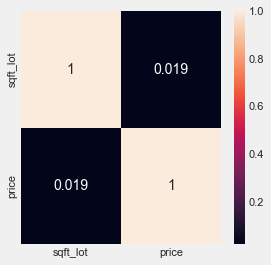

In [67]:
# Calculate the Pearson correlation coefficient
corr, p = stats.pearsonr(data_2['sqft_lot'], data_2['price'])

# Calculate a 99% confidence interval for the correlation
ci = np.around(stats.pearsonr(data_2['sqft_lot'], data_2['price']), decimals=2)

# Print the results
print("Correlation coefficient: {}".format(corr))
print("Hypothesis test: p = {}".format(p))
print("99% CI for the correlation: ({}, {})".format(ci[0], ci[1]))


df=data_2[['sqft_lot','price']]
sns.heatmap(df.corr(),annot=True)
sns.set(rc={'figure.figsize':(4,4)})

if p < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

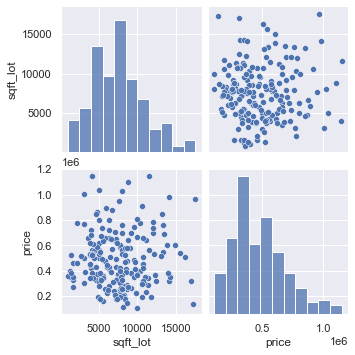

In [68]:
sns.pairplot(df)

In [69]:
x=df.iloc[:, 0].values
y=df.iloc[:,1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,
                                                                    random_state=100)

import statsmodels.api as st
x_train_st = st.add_constant(x_train)
ler= st.OLS(y_train,x_train_st).fit()
ler.params
ler.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.06806
Date:                Sun, 30 Apr 2023   Prob (F-statistic):              0.795
Time:                        18:51:02   Log-Likelihood:                -2193.8
No. Observations:                 160   AIC:                             4392.
Df Residuals:                     158   BIC:                             4398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.003e+05   4.22e+04     11.869      0.000    4.17e+05    5.84e+05
x1            -1.3449      5.155     -0.261      0.795     -11.527       8.837
==============================================================================
Omnibus:                       11.796   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.854
Skew:                           0.694   Prob(JB):                      0.00162
Kurtosis:                       2.993   Cond. No.                     1.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

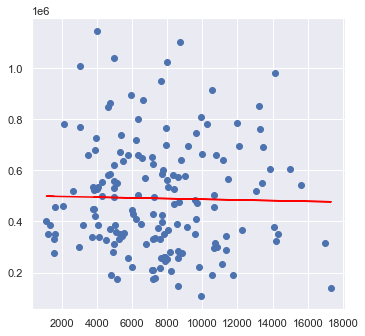

In [70]:
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.scatter(x_train,y_train)
plt.plot(x_train, ler.params[0] + ler.params[1]*x_train,'red')
plt.show()

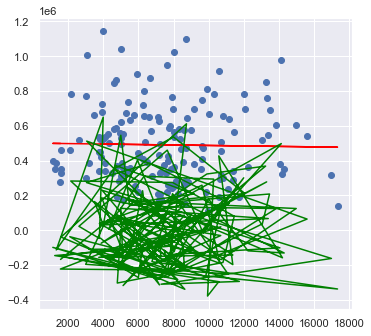

R2 score is:  -0.05572964783255974


In [71]:
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.scatter(x_train,y_train)
plt.plot(x_train, ler.params[0] + ler.params[1]*x_train,'red')
plt.plot(x_train, ler.resid, color='green')
plt.show()

x_test_st = st.add_constant(x_test)
y_test_pred= ler.predict(x_test_st)
r2 = skm.r2_score(y_test, y_test_pred)
print('R2 score is: ',r2)

In [72]:
 data_1['sqft_lot'],data_1['bedrooms'],data_1['waterfront'],data_1['condition']

(4134     4840
 797      5000
 2816      923
 1916    10284
 2439     9600
         ...  
 3086    10280
 3851    11472
 1671     4234
 3100     8221
 3832     4558
 Name: sqft_lot, Length: 100, dtype: int64,
 4134    4.0
 797     3.0
 2816    2.0
 1916    5.0
 2439    4.0
        ... 
 3086    3.0
 3851    3.0
 1671    2.0
 3100    3.0
 3832    4.0
 Name: bedrooms, Length: 100, dtype: float64,
 4134    0
 797     0
 2816    0
 1916    0
 2439    0
        ..
 3086    0
 3851    0
 1671    0
 3100    0
 3832    0
 Name: waterfront, Length: 100, dtype: int64,
 4134    4
 797     3
 2816    3
 1916    4
 2439    5
        ..
 3086    3
 3851    4
 1671    3
 3100    3
 3832    3
 Name: condition, Length: 100, dtype: int64)

In [73]:
df1=new_data[['sqft_lot', 'waterfront', 'bathrooms','condition','price']]
x = df1[['sqft_lot', 'waterfront', 'bathrooms','condition']]
y = df1['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,
                                                                    random_state=100)

import statsmodels.api as st
x_train_st = st.add_constant(x_train)
ler= st.OLS(y_train,x_train_st).fit()
ler.params
ler.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     225.4
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          1.21e-169
Time:                        18:51:03   Log-Likelihood:                -41283.
No. Observations:                3047   AIC:                         8.258e+04
Df Residuals:                    3042   BIC:                         8.261e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.22e+04   2.22e+04      1.447      0.148   -1.14e+04    7.58e+04
sqft_lot       0.3027      0.944      0.321      0.748      -1.548       2.153
waterfront  2.768e+05   8.34e+04      3.321      0.001    1.13e+05     4.4e+05
bathrooms   1.426e+05   4836.221     29.476      0.000    1.33e+05    1.52e+05
condition   4.312e+04   5079.500      8.490      0.000    3.32e+04    5.31e+04
==============================================================================
Omnibus:                      181.461   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.537
Skew:                           0.639   Prob(JB):                     4.27e-47
Kurtosis:                       3.225   Cond. No.                     2.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
print(ler.rsquared_adj)

0.22759786323666764


<h5>The multi regression equation is : Y = 3.22e+04 + 0.3027 * (sqft_lot) + 2.768e+05 * (waterfront) + 1.426e+05 * (bathrooms) + 4.312e+04 * (condition)</h5>

not a good fit